# Tiny ARC

This notebook focuses on solving small-scale puzzles from the ARC (Abstraction and Reasoning Corpus) dataset, allowing you to test your solution (`solver_v1`) on simpler, less computationally demanding challenges. Working on small examples helps build a solid foundation before scaling up to larger and more complex grids (such as 30x30).

The `get_tiny_arc()` function selects challenges based on grid dimensions, filtering puzzles by their width (`n`) and height (`m`). You can choose between the training or evaluation set and set constraints to only work on grids that fall within a manageable size range.

### Key Features:
- **Select challenges by size**: Work on grids that are easier to compute by filtering based on width (`n`) and height (`m`).
- **Test your solver**: Import and test your solution in a controlled environment with simpler challenges before scaling up to more complex tasks.


In [1]:
import random
from abstract_and_reason import solver_v1

In [2]:
anr = solver_v1.Solver()

### Choose between training and evalutation set (commented)

challenges = anr.training_challenges # anr.evaluation_challenges
solutions = anr.training_solutions # anr.evaluation_solutions

def get_tiny_arc(challenges, solutions, max_n, max_m):
    """
    Selects challenges from the ARC dataset based on grid size.

    This function filters and returns a list of challenge IDs where the average size of the input and output grids 
    (width and height) is less than or equal to the specified maximum grid dimensions (max_n x max_m).

    Args:
        challenges (dict): A dictionary containing ARC challenges, either from the training or evaluation set.
        solutions (dict): A dictionary containing corresponding solutions to the challenges.
        max_n (int): The maximum allowed width (n) for a grid.
        max_m (int): The maximum allowed height (m) for a grid.

    Returns:
        list: A list of challenge IDs that meet the size constraints.
    """
    ids = list(challenges)
    ids_sizes = []
    
    for challenge_id in ids:
        input_mean = 0
        output_mean = 0
        nb_example = 0
        
        for challenge in challenges[challenge_id]['train']:
            input_size = sum(len(obj) for obj in challenge['input']) * len(challenge['input'])
            output_size = sum(len(obj) for obj in challenge['output']) * len(challenge['output'])
            
            input_mean += input_size
            output_mean += output_size
            
            nb_example += 1
        
        input_mean /= nb_example
        output_mean /= nb_example
        
        if input_mean <= max_n**2 and output_mean <= max_m**2:
            ids_sizes.append(challenge_id)
    
    return ids_sizes


In [3]:
smol_challenges = get_tiny_arc(challenges, solutions, max_n=8, max_m=8)

print(f"Small challenges set contains {len(smol_challenges)} challenges")

Small challenges set contains 26 challenges


## Display a random small challenge

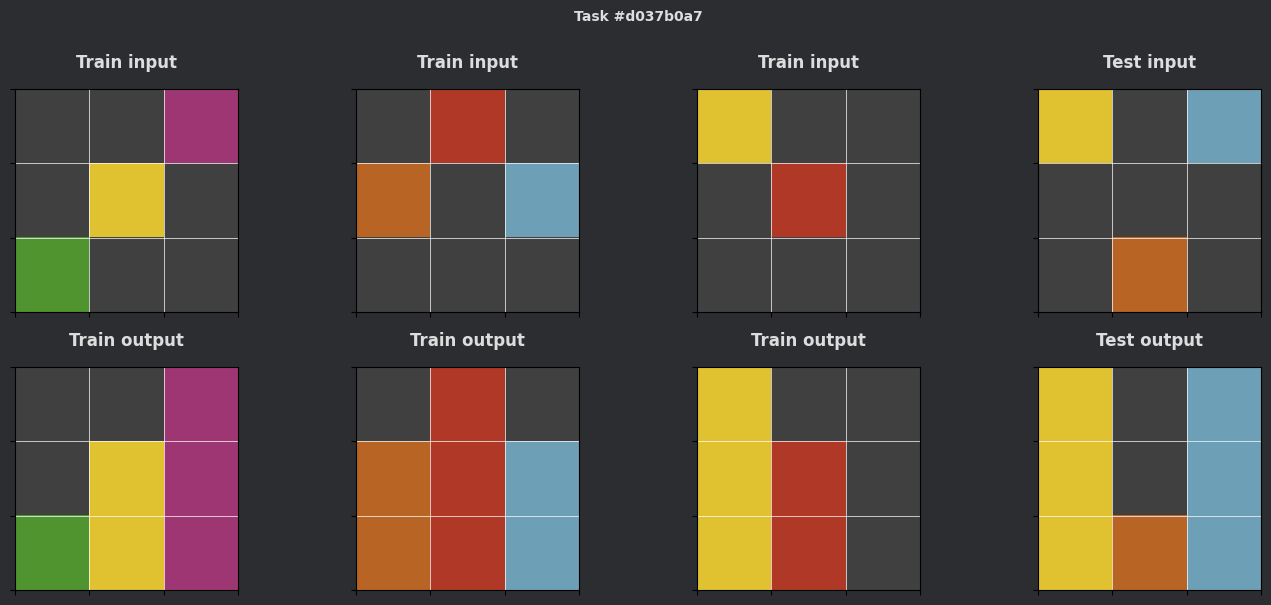

In [4]:
random_id = random.choice(smol_challenges)

puzzle_inps_train, puzzle_outs_train, puzzle_inps_test, puzzle_outs_test = anr.process_challenge(random_id, challenges, solutions)
anr.display_task(random_id, puzzle_inps_train, puzzle_outs_train, puzzle_inps_test, puzzle_outs_test)